In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
!ls "/content/drive/My Drive/News"

Fake.csv  True.csv


In [4]:
real = pd.read_csv("/content/drive/My Drive/News/True.csv")
fake = pd.read_csv("/content/drive/My Drive/News/Fake.csv")

In [5]:
#Displayed the first 5 rows of the real news dataset
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
#Displayed the first 5 rows of the fake news dataset
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
#Shape of real news dataset
print("Real news: ",real.shape)
#Shape of fake news dataset
print("Fake News: ", fake.shape)

Real news:  (21417, 4)
Fake News:  (23481, 4)


In [8]:
#Assigning a value of 0 for all real news data and placing it in the dataframe
class0 = []

for i in range(21417):
  class0.append(0)

real.insert(4, "class", class0, True)

In [9]:
#Assigning a value of 1 for all fake news data and placing it in the dataframe
class1 = []

for i in range(23481):
  class1.append(1)

fake.insert(4, "class", class1, True)

In [10]:
#Concactenating fake news and real news into 1 total dataset
total = pd.concat([real,fake])
total = total.sample(frac = 1)

In [11]:
#Shape of total
total.shape

(44898, 5)

In [12]:
#total = total.sample(frac=1)
pd.set_option('display.width', total.shape[0])
total.head()


,title,text,subject,date,class
10938,"BREAKING: WOMEN, MEN ARRESTED After MAJOR BRAW...",The moral decay of our nation continues full s...,politics,"May 9, 2017",1
1749,"Hoping to change his luck in Congress, Trump t...",WASHINGTON (Reuters) - Fresh off striking a bu...,politicsNews,"September 13, 2017",0
11238,MUSLIM BROTHERHOOD Peddling Sharia As “Social ...,THIRTEEN REASONS TO DECLARE MUSLIM BROTHERHOOD...,politics,"Apr 1, 2017",1
2957,House panel presses White House for fuller res...,WASHINGTON (Reuters) - The leaders of the U.S....,politicsNews,"June 29, 2017",0
730,Trump Gets HUMILIATED By His Own Joint Chiefs...,It appears Donald Trump jumped the gun when he...,News,"July 27, 2017",1


In [13]:
#Extract only the values for title (input) and class (output)
data = total[['title','class']]
data.head()


,title,class
10938,"BREAKING: WOMEN, MEN ARRESTED After MAJOR BRAW...",1
1749,"Hoping to change his luck in Congress, Trump t...",0
11238,MUSLIM BROTHERHOOD Peddling Sharia As “Social ...,1
2957,House panel presses White House for fuller res...,0
730,Trump Gets HUMILIATED By His Own Joint Chiefs...,1


In [14]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())



Mean Length 80.11171989843646
Min Length 8
Max Length 286


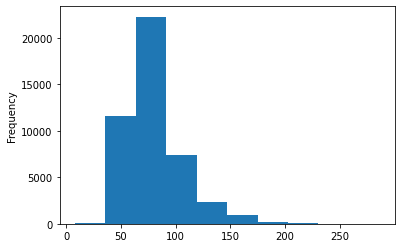

In [15]:
#plotting the frequency of characters on a histogram
import seaborn as sns

x = data['title'].apply(len).plot.hist()

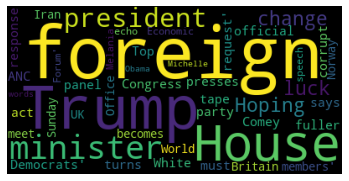

In [16]:
#Word cloud of most common words from real news 
#For fake news, change ["class"] == 0 to 1
from wordcloud import WordCloud, STOPWORDS

#Note to self: fix for entire dataset
text = data[data["class"] == 0].values
wc = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [17]:
#Extracting numpy arrays for the title and classes
titles = data["title"].values
labels = data["class"].values



In [18]:
#Data Preprocessing


#Lowercase letters
data['title'] = data['title'].str.lower()
data.head()


#Ensure that all necessary punctuations are in one list
#Include ' and " as they are not default

import string
#Fix this (note to self)
punc = list(string.punctuation)
punc.append('\'')
punc.append('"')
print(punc)


#Loop through dataframe and remove all punctuations
def removePunc(text):
    for i in string.punctuation:
        text = text.replace(i, '')
    return text


# Apply to the DF series
data['title'] = data['title'].apply(removePunc)
data.head()


#Import nltk preprocessing library to convert text into a readable format
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize


#Tokenize the string (create a list -> each index is a word)
data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
data.head()

#Define text lemmatization model (eg: walks will be changed to walk)
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()


#Loop through title dataframe and lemmatize each word
def lemma(data):
  return [lemmatizer.lemmatize(w) for w in data]

#Apply to dataframe
data['title'] = data['title'].apply(lemma)

data.head()



#Define all stopwords in the English language (it, was, for, etc.)
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stopwords)
#Remove them from our dataframe
data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])





data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '"']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,title,class
10938,"[breaking, woman, men, arrested, major, brawl,...",1
1749,"[hoping, change, luck, congress, trump, turn, ...",0
11238,"[muslim, brotherhood, peddling, sharia, “, soc...",1
2957,"[house, panel, press, white, house, fuller, re...",0
730,"[trump, get, humiliated, joint, chief, contrad...",1


In [19]:
from sklearn.model_selection import train_test_split

#Split data into training and testing dataset
#We teach our model based on the training set (including the labels)
#We take the labels away to test our model with the testing set
title_train, title_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=1000)



In [20]:
from gensim.models import Word2Vec
#Create a word2vec model
vec = Word2Vec(min_count=1)
#Build its vocabulary by looping through the title dataset
vec.build_vocab([x for x in data['title'].values])
#Print the vocabulary size
print(len(vec.wv.vocab))
#Train our word2vec model on all titles for 5 epochs
vec.train([x for x in data['title'].values],total_examples=vec.corpus_count,epochs=5)

22951


(2020590, 2255320)

In [21]:
#Word vectors for the selected word
vec['car']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 1.04349181e-01, -1.95309579e-01,  3.70148182e-01,  9.67159122e-02,
        1.29540870e-02,  6.59113824e-01,  5.75157940e-01, -4.92670149e-01,
        2.72421390e-01, -1.24665785e+00, -4.87865627e-01, -4.71730560e-01,
       -3.83109823e-02, -4.09607925e-02,  6.27469942e-02,  4.33625996e-01,
       -9.02657211e-03,  1.01116195e-01,  6.78008571e-02,  2.02461794e-01,
       -2.29451939e-01, -1.93794742e-01, -2.09343642e-01,  2.55079597e-01,
        3.96494746e-01, -4.89410106e-03, -1.94954768e-01, -6.20425045e-02,
       -3.95742878e-02,  2.81510979e-01,  1.16525330e-01,  4.31790620e-01,
        3.00148815e-01, -4.44640875e-01, -3.71433884e-01, -2.11279511e-01,
        7.80969337e-02, -2.99238563e-01,  1.37462214e-01,  3.21516534e-03,
        2.24138591e-02,  2.11270690e-01,  5.20017564e-01, -3.48720789e-01,
        1.39712885e-01,  7.10904300e-01,  2.06573486e-01, -3.50827456e-01,
       -3.65823925e-01,  4.23026353e-01, -4.87947352e-02,  3.43736112e-02,
        6.71820104e-01, -

In [22]:
#Most similar word vectors to another one
vec.most_similar("florida")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('antigay', 0.9977872967720032),
 ('clerk', 0.9948059916496277),
 ('leftwing', 0.9943658113479614),
 ('argues', 0.9943347573280334),
 ('rank', 0.9937988519668579),
 ('debbie', 0.9936710596084595),
 ('discrimination', 0.9932295680046082),
 ('cophating', 0.9926937818527222),
 ('sheila', 0.9926355481147766),
 ('progun', 0.992597222328186)]

In [23]:
#Shape of the word vectors
vec.wv.vectors.shape

(22951, 100)

In [24]:
#Import Doc2Vec to get a vector for each individual title
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
#Add a tag which denotes a new document everytime a new dataset is seen
#Example: [[word1,word2,word3,word4],document0]
tags = [TaggedDocument(doc, [i]) for i, doc in enumerate(title_train)]

#Define the Doc2Vec model
doc = Doc2Vec(tags,vector_size=100,min_count=1,epochs=5)
#Build the vocabulary based on the tag structures defined above
#doc.build_vocab(tags)
#Train the doc2vec model
doc.train(tags, total_examples=doc.corpus_count,epochs=doc.epochs)

In [26]:
#Derive the length of the vocabulary
print(len(doc.wv.vocab))

21221


In [27]:
#Derive vectors for each of the documents
train_vectors = [doc.infer_vector(i) for i in title_train]

In [28]:
test_vectors = [doc.infer_vector(i) for i in title_test]

In [29]:
train_vectors = np.array(train_vectors)
test_vectors = np.array(test_vectors)

In [30]:
len(doc.wv.vocab)

21221

In [31]:
train_vectors.shape

(35918, 100)

In [32]:
print(train_vectors)

[[ 9.2193186e-03 -1.4956165e-02  3.6244802e-02 ...  1.1397374e-02
  -1.1436724e-02 -7.2662387e-04]
 [ 1.1165487e-02  1.0127307e-02  5.7624909e-03 ...  3.4135336e-03
  -2.3055119e-02 -1.2651797e-02]
 [ 4.6519981e-05  1.7949004e-02  1.9925794e-02 ...  2.9980298e-02
  -8.8224038e-03 -2.3920793e-02]
 ...
 [-5.8834185e-03  6.1994236e-02  1.8414546e-02 ...  4.2487748e-02
  -1.4358572e-02 -3.0729558e-02]
 [ 1.1889640e-02 -3.6250602e-03  2.7054173e-03 ...  2.2165226e-02
  -8.5012615e-03 -2.2587448e-03]
 [ 4.7435503e-02  3.1063996e-02  2.6118455e-02 ... -7.6135434e-03
  -2.0956349e-02 -3.3690661e-02]]


In [33]:
#Tensorflow neural network
import tensorflow as tf
#Sequential model
model = tf.keras.Sequential()

#Dense layer - 128 units -input shape is for the 100 vector length, relu activation
model.add(tf.keras.layers.Dense(128,input_shape=[100],activation='relu'))
#'Turn off' half the neurons (reduce overfitting - model will not memorize data and will understand patterns)
model.add(tf.keras.layers.Dropout(0.5))
#Dense layer - 64 units, relu activation
model.add(tf.keras.layers.Dense(64,activation='relu'))
#Dense layer - 32 units, relu activation
model.add(tf.keras.layers.Dense(32,activation='relu'))
#Dense layer - 16 units, relu activation
model.add(tf.keras.layers.Dense(16,activation='relu'))
#Dense layer - 1 units, sigmoid activation
#Binary problem - probability of 1 class - derived with sigmoid
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

#Train on Adam optimizer with 1e-4 learning rate, loss of binary crossentropy, accuracy tracked
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])

#Train on training set, test on testing set, for 5 epochs
model.fit(train_vectors,y_train,validation_data=[test_vectors,y_test],epochs=25)

#Show model architecture
model.summary()

Epoch 1/25
1123/1123 [==============================] - 9s 5ms/step - loss: 0.5187 - accuracy: 0.7689 - val_loss: 0.4166 - val_accuracy: 0.8134
Epoch 2/25
1123/1123 [==============================] - 5s 5ms/step - loss: 0.4070 - accuracy: 0.8137 - val_loss: 0.3995 - val_accuracy: 0.8187
Epoch 3/25
1123/1123 [==============================] - 5s 5ms/step - loss: 0.3911 - accuracy: 0.8223 - val_loss: 0.3886 - val_accuracy: 0.8214
Epoch 4/25
1123/1123 [==============================] - 5s 5ms/step - loss: 0.3765 - accuracy: 0.8276 - val_loss: 0.3727 - val_accuracy: 0.8307
Epoch 5/25
1123/1123 [==============================] - 5s 5ms/step - loss: 0.3651 - accuracy: 0.8368 - val_loss: 0.3623 - val_accuracy: 0.8363
Epoch 6/25
1123/1123 [==============================] - 5s 5ms/step - loss: 0.3574 - accuracy: 0.8405 - val_loss: 0.3537 - val_accuracy: 0.8378
Epoch 7/25
1123/1123 [==============================] - 5s 5ms/step - loss: 0.3510 - accuracy: 0.8417 - val_loss: 0.3465 - val_accuracy:

In [34]:
train_vectors.shape

(35918, 100)

In [35]:
#Algorithm used to preprocess a new sentence


#New sentence for the model
sentence = "California governor says he will use legal tactics of Texas abortion ban to implement gun control"

#Lowercase words
sentence = sentence.lower()

#Ensure that all necessary punctuations are in one list
#Include ' and " as they are not default
punc = list(string.punctuation)
punc.append('\'')
punc.append('"')
print(punc)

#Loop through sentence and remove all punctuations
for i in string.punctuation:
  sentence = sentence.replace(i, '')
    
#Tokenize sentence -> all words in a new list
tok = sentence.split(' ')

#Define text lemmatization model (eg: walks will be changed to walk)
lemmatizer = WordNetLemmatizer()

#Lemmatize each word in the sentence
for w in sentence:
  lemmatizer.lemmatize(sentence)




#Define all stopwords in the English language (it, was, for, etc.)
stop = stopwords.words('english')




#Remove them from our dataframe and store in a new list
minStop = []

for i in tok:
  if i not in stop:
    minStop.append(i)

#Doc2Vec tags
tag = [TaggedDocument(minStop,[0])]

predVec = [doc.infer_vector(minStop)]
predVec = np.array(predVec)

print(predVec)



['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '"']
[[ 1.03027187e-02 -5.42743038e-03  6.43382128e-03  2.09822580e-02
  -8.51052534e-03  1.21739842e-02  9.82273556e-03 -1.44921122e-02
  -2.57635303e-03 -1.81201659e-02 -1.20418640e-02 -2.36000605e-02
  -2.27599945e-02 -1.32404547e-02 -2.03780476e-02 -8.92835297e-03
   3.42324413e-02 -7.02111563e-03 -9.41620022e-03 -1.13500077e-02
  -3.74559164e-02  6.11764332e-03 -1.81380734e-02  1.19039090e-02
   4.53117536e-03  2.13256925e-02 -2.34392732e-02 -7.14403111e-03
  -4.90000471e-03  2.17065960e-02 -2.57414617e-02  7.09117623e-03
  -1.93828754e-02 -3.35035436e-02 -2.22773720e-02 -2.13526487e-02
   6.40426353e-02 -5.98212006e-03  3.25885378e-02  2.50625350e-02
   2.35947017e-02 -1.28168277e-02 -1.70601800e-03 -1.50656665e-03
  -4.38452698e-03  2.56673957e-06 -3.18136439e-02 -2.63421377e-03
  -3.68154794e-02  2.52813613e-03 -1

In [36]:
predVec.shape

(1, 100)

In [37]:
#predicting the probability of fake news on our field data
prediction = model.predict(predVec)



In [38]:
#Printing the prediction
print(prediction)

[[0.28030127]]


In [39]:
import pickle 

pickle.dump(model, open('model.pkl','wb'))



INFO:tensorflow:Assets written to: ram://0b4af3ae-0c92-406a-aef6-502dd543a979/assets


In [40]:
pickle.dump(doc,open('doc.pkl','wb'))
